In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

# this gemini for problem

In [6]:
import chardet #

with open('spam.csv', 'rb') as f:
    rawdata = f.read()
result = chardet.detect(rawdata)
encoding = result['encoding']

df = pd.read_csv('spam.csv', encoding=encoding)


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# 1.DATA CLEANING
# 2.EDA
# 3.Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

# 1.DATA CLEANING

In [9]:
df.drop(["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"] ,axis=1,  inplace=True)

In [10]:
df.rename(columns={"v1" : 'target' , "v2" : "sms"} , inplace=True)
df.sample(5)

,target,sms
2997,ham,No b4 Thursday
5053,spam,Double Mins & Double Txt & 1/2 price Linerenta...
4218,ham,Anything lor if they all go then i go lor...
4393,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
1623,ham,"Ah, well that confuses things, doesn‰Û÷t it?"


In [11]:
df.shape

(5572, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
sms       0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

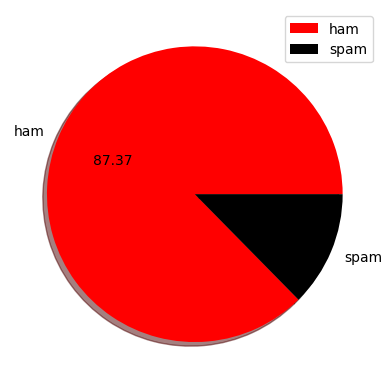

In [19]:
plt.pie(df['target'].value_counts() ,labels=['ham','spam'] ,  autopct="%.2f" , shadow=True , colors=['r','black'])
plt.legend()
plt.show()

# DATA IS IMBALANCED

In [20]:
import nltk

In [21]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# TEXT PREPROCESSING

In [22]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer

In [23]:
stop_words = set(stopwords.words('english'))


def preprocess(text):

    text = text.lower() # Convert in to lower
    # Combine punctuation removal and specific character removal:
    text = re.sub(r"[^\w\s#@\$]" , " " , text)
    tokens = text.split() # TOKENIZE

    # REMOVE STOP-WORDS
    tokens = [word for word in tokens if word not in stop_words]

    # STEMMING : STEAMMING EXMAPLE CONVERT "LOVING" TO "LOVE" , "DANCING" TO "DANC"

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return " ".join(tokens)

In [24]:
df['clean_sms'] = df['sms'].apply(preprocess)
df.head()

,target,sms,clean_sms
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [25]:
from wordcloud import WordCloud

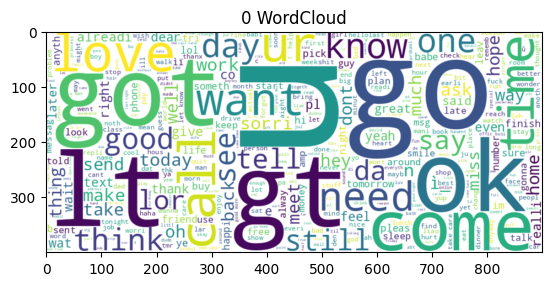

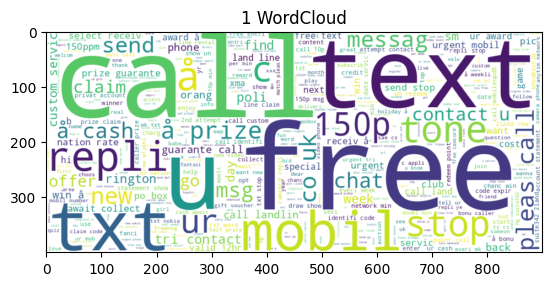

In [26]:
for i in [0,1]:
    Words= " ".join(df.loc[df['target'] == i]["clean_sms"])

    wordcloud = WordCloud(max_words=400, width=900, height=400, background_color='white').generate(Words)
    plt.imshow(wordcloud , interpolation = "bilinear")
    plt.title(f"{i} WordCloud")
    plt.show()

In [27]:
df[df['target'] == 1]['sms']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: sms, Length: 653, dtype: object

In [28]:
df.head()

,target,sms,clean_sms
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , GradientBoostingClassifier , IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [30]:
X = df['clean_sms']
y = df['target']

tf_tdf = TfidfVectorizer()
X = tf_tdf.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [31]:
X_train.shape

(3618, 7218)

In [32]:
models = {
    "Liner_Regression" : LogisticRegression(),
    "SVM" : SVC(),
    "GaussinNB" : GaussianNB(),
    "MultinomialNB" : MultinomialNB(),
    "BernoulliNb" : BernoulliNB(),
    "RandomForestClf" : RandomForestClassifier(),
    "Decision-Tree-Clf" : DecisionTreeClassifier()
}

# for model_name , model in models.items():
    
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(model_name)
    print("\nACCURACY:")
    print(accuracy_score(y_test,y_pred)*100)
    print('CLASSIFICATION-REPORT:\n')
    print(classification_report(y_test,y_pred))
    print('\nCONFUSION-MATRIX:')
    print(confusion_matrix(y_test,y_pred))
    
    
    print("*"*55)

In [37]:
model = BernoulliNB()

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10]}

clf = GridSearchCV(estimator=model,param_grid=param_grid ,cv = 5 , verbose=True)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), param_grid={'alpha': [0.1, 1, 10]},
             verbose=True)

In [42]:
clf.best_params_

{'alpha': 0.1}

In [45]:
model = clf.best_estimator_
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9851708575112831

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1331
           1       0.96      0.93      0.95       220

    accuracy                           0.99      1551
   macro avg       0.98      0.96      0.97      1551
weighted avg       0.99      0.99      0.99      1551



In [47]:
print(confusion_matrix(y_test,y_pred))

[[1323    8]
 [  15  205]]


In [48]:
import joblib

In [51]:
joblib.dump(model , 'BernoulliNB_Model.joblib')

['BernoulliNB_Model.joblib']